# Import dataset and preprocess

In [6]:
# from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pylab

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

with open("C:\\Users\\User\\Desktop\\RBPMap\\dataset\\processed\\raw_dataset.txt", 'r') as opened_file:
    txt_lines = opened_file.readlines()

sequences = []
label_array = np.zeros(len(txt_lines))
for i in range (len(txt_lines)):
    line_elements = txt_lines[i].split('\t')
    label_array[i] = int(line_elements[0])
    seq = list(line_elements[1][:-1])
    # data_array = np.array([match_character_to_complex_number(char) for char in seq], dtype=complex)
    sequences.append(seq)

raw_dataset = pd.DataFrame(data=sequences, columns=range(1,201))
raw_dataset['label'] = label_array

# Train an SVM model

In [7]:
chars = ['A', 'a', 'C', 'c', 'G', 'g', 'T', 't']
real_values = [1, 1/(2 ** 0.5), 0, -1/(2 ** 0.5), -1, -1/(2 ** 0.5), 0, 1/(2 ** 0.5)]
imag_values = [0, 1/(2 ** 0.5), 1, 1/(2 ** 0.5), 0, -1/(2 ** 0.5), -1, -1/(2 ** 0.5)]

dataset_real_values = raw_dataset.replace(chars, real_values)
dataset_imag_values = raw_dataset.replace(chars, imag_values)

new_column_names = range(201,402)
dataset_imag_values.rename(columns=dict(zip(dataset_imag_values.columns, new_column_names)), inplace=True)
dataset_imag_values.rename(columns={401: 'label'}, inplace=True)
dataset = pd.concat([dataset_real_values.iloc[:, 0:200], dataset_imag_values], axis=1)
# print(dataset['label'])

In [10]:
from sklearn.model_selection import train_test_split
[train, test] = train_test_split(dataset,train_size=0.8, random_state=103)
X_train = train.iloc[:, 0:400]
Y_train = train['label']
# print(X_train.head())

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn import metrics
C_values = np.logspace(-10,10,21)
train_scores={}
test_scores={}
for k in C_values:
    svm_model = SVC(C=k, kernel='linear')
    cv_results = cross_validate(svm_model, X_train, Y_train, cv=10, return_train_score=True, n_jobs=-1)
    train_scores[k] = np.mean(cv_results['train_score'])
    test_scores[k] = np.mean(cv_results['test_score'])

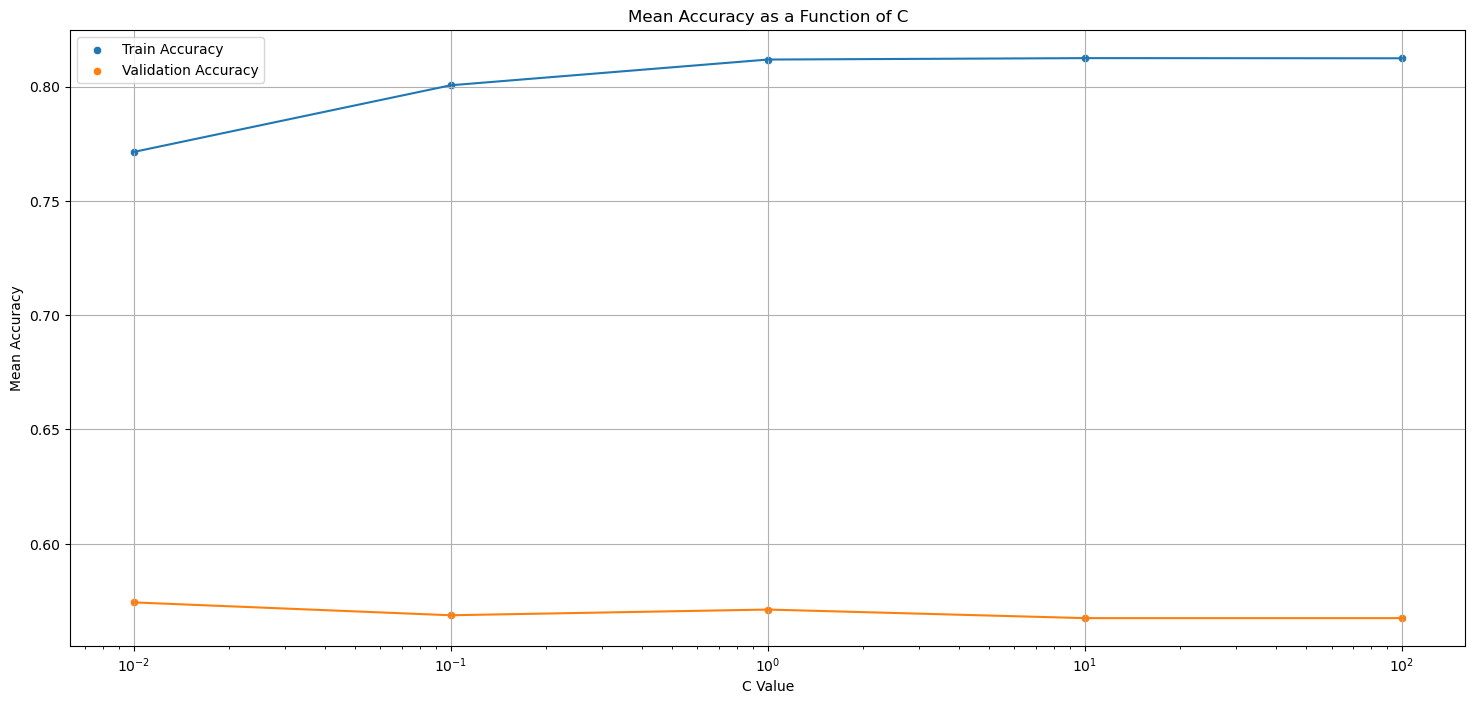

In [13]:
plt.figure(figsize=(18, 8))
figure = sns.scatterplot(x=train_scores.keys(), y=train_scores.values())
_ = sns.scatterplot(x=test_scores.keys(), y=test_scores.values())
_ = sns.lineplot(x=train_scores.keys(), y=train_scores.values())
_ = sns.lineplot(x=test_scores.keys(), y=test_scores.values())
figure.grid('both')
plt.xscale('log')
figure.set_xlabel('C Value')
figure.set_ylabel('Mean Accuracy')
figure.set_title('Mean Accuracy as a Function of C')
figure = figure.legend(['Train Accuracy','Validation Accuracy'])